In [1]:
import torch
from solution import BO_algo, train_agent, f, plot_agent
import ipywidgets
from ipywidgets import interact
import IPython
from sklearn.gaussian_process.kernels import Matern
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

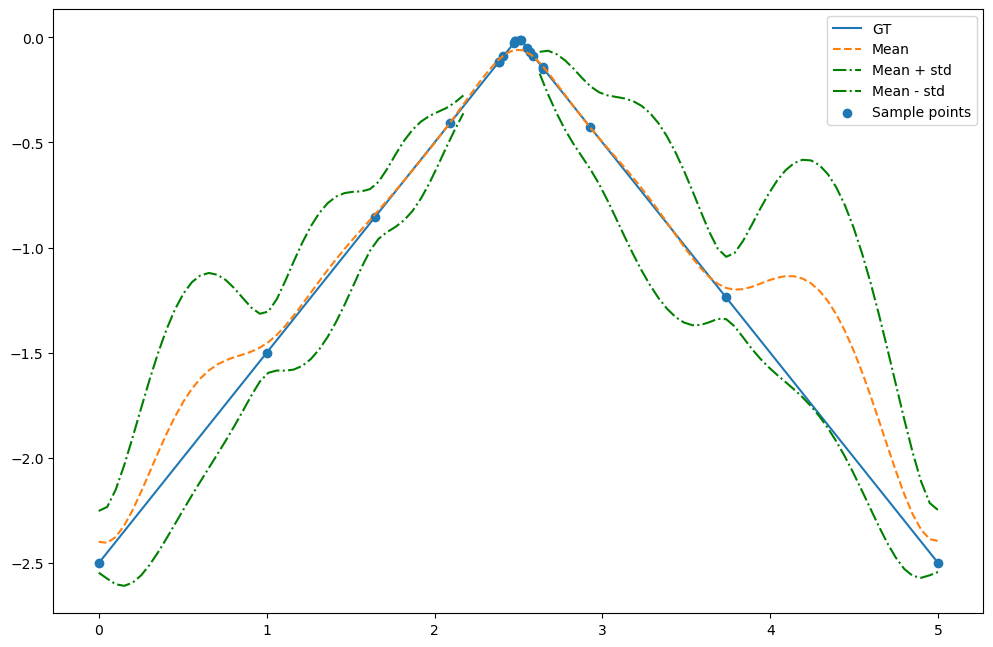

In [3]:
agent = BO_algo()
train_agent(agent)
IPython.display.clear_output(wait=True)
plt.close()
plot_agent(agent)

In [4]:
def run_interact(lengthscale, nu, variance, prior_mu, sigma_f, n_iters):
    agent = BO_algo()
    agent.μf_prior = prior_mu
    agent.σ_f = sigma_f
    agent.var_f = variance
    agent.Matern_f_np = Matern(length_scale=lengthscale, nu=nu)
    agent.Matern_f = lambda x, y: agent.var_f * torch.from_numpy(agent.Matern_f_np(x, y))
    
    train_agent(agent, n_iters=n_iters)
    plot_agent(agent)

interact(run_interact,
        lengthscale=ipywidgets.FloatSlider(value=0.6, min=0.001, max=2, step=0.01, continuous_update=False),
        nu=ipywidgets.FloatSlider(value=2.5, min=0.5, max=5, step=0.01, continuous_update=False),
        variance=ipywidgets.FloatSlider(value=0.5, min=0.1, max=1, step=0.01, continuous_update=False),
        prior_mu=ipywidgets.FloatSlider(value=0., min=-1., max=1., step=0.01, continuous_update=False),
        sigma_f=ipywidgets.FloatSlider(value=0.15, min=0.01, max=0.3, step=0.01, continuous_update=False),
        n_iters=ipywidgets.IntSlider(value=20, min=1, max=100, continuous_update=False),
        );

interactive(children=(FloatSlider(value=0.6, continuous_update=False, description='lengthscale', max=2.0, min=…